In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
%cd /content/drive/MyDrive/Capstone

/content/drive/MyDrive/Capstone


In [52]:
train = pd.read_csv('/content/drive/MyDrive/Capstone/Train_Data.csv')
test = pd.read_csv('/content/drive/MyDrive/Capstone/Test_Data.csv')

##Preprocessing

In [53]:
train.isnull().sum()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

In [54]:
test.isnull().sum()

index      0
pc         0
ld        28
m0         0
m1         0
m2         0
m3        67
m4        71
m5       100
m6       121
m7       149
m8       148
m9       180
m10      200
m11      241
m12      220
m13      275
m14      285
ma         0
dtype: int64

In [55]:
train = train.fillna(method = 'pad')
test = test.fillna(method = 'pad')

<Axes: >

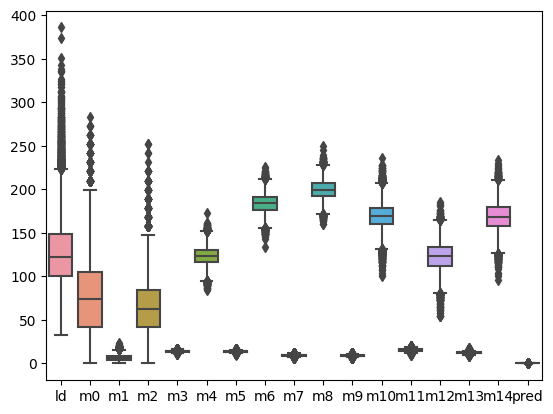

In [56]:
sns.boxplot(train)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22584 entries, 0 to 22583
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc      22584 non-null  object 
 1   ld      22584 non-null  float64
 2   m0      22584 non-null  float64
 3   m1      22584 non-null  float64
 4   m2      22584 non-null  float64
 5   m3      22584 non-null  float64
 6   m4      22584 non-null  float64
 7   m5      22584 non-null  float64
 8   m6      22584 non-null  float64
 9   m7      22584 non-null  float64
 10  m8      22584 non-null  float64
 11  m9      22584 non-null  float64
 12  m10     22584 non-null  float64
 13  m11     22584 non-null  float64
 14  m12     22584 non-null  float64
 15  m13     22584 non-null  float64
 16  m14     22584 non-null  float64
 17  ma      22584 non-null  object 
 18  pred    22584 non-null  int64  
dtypes: float64(16), int64(1), object(2)
memory usage: 3.3+ MB


In [58]:
train_cat = train.select_dtypes(object)
train_num = train.select_dtypes(["int64", "float64"])

In [59]:
for col in train_cat:
  train_cat[col] = LabelEncoder().fit_transform(train_cat[col])

In [60]:
train = pd.concat([train_cat, train_num], axis=1, join='inner')

In [61]:
train

,pc,ma,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pred
0,3,3,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,0
1,3,3,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,0
2,0,2,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,13.3304,122.5350,11.7136,176.8200,1
3,2,0,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,13.3304,124.8030,13.8424,168.2625,0
4,0,2,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,13.8424,150.1185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,0,2,139.08,73.5,7.2,84.0,13.8016,115.9725,13.8856,189.0000,8.6536,196.7490,9.2216,170.8770,17.3744,164.7240,12.5720,144.4065,1
22580,2,0,156.74,63.0,5.6,105.0,13.6464,130.2000,12.4688,180.3690,10.6984,212.6355,8.1152,167.8110,13.5656,129.5070,11.1344,144.4065,1
22581,1,3,115.63,147.0,4.8,31.5,13.4344,115.5000,13.5752,190.8900,9.6144,219.6810,9.3120,156.7440,15.9712,109.3680,12.8480,153.5835,0
22582,3,3,216.26,105.0,4.8,31.5,13.8176,112.5285,13.2408,166.8555,9.0160,200.3610,7.4760,174.7830,16.7888,135.1770,12.7336,158.0985,0


In [62]:
test_cat = test.select_dtypes(object)
test_num = test.select_dtypes(["int64", "float64"])

In [63]:
for col in test_cat:
  test_cat[col] = LabelEncoder().fit_transform(test_cat[col])

In [66]:
test = pd.concat([test_cat, test_num], axis=1, join='inner')

In [67]:
test

,pc,ma,index,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14
0,0,2,0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100
1,3,3,1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230
2,1,3,2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085
3,4,1,3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745
4,2,0,4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,12.1984,157.6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,4,1,3981,109.45,126.0,4.0,94.5,14.6168,131.4495,13.1032,189.0840,8.3384,203.2275,9.6848,158.7915,14.6384,97.2510,12.3336,180.0435
3982,1,3,3982,188.31,136.5,1.6,21.0,12.9032,115.1535,14.3616,189.4830,7.6680,183.8865,9.8032,172.2945,16.1512,110.7330,12.1680,204.5505
3983,0,2,3983,80.99,31.5,4.8,115.5,15.0696,114.6810,14.0200,186.0810,9.2080,193.6200,9.1600,170.1840,16.1512,127.4700,13.5016,204.5505
3984,1,3,3984,120.64,42.0,0.8,126.0,13.8960,123.6585,13.5496,187.8975,9.7944,189.0525,9.4752,173.0295,17.1728,113.0430,13.1480,164.2410


pc
-0.03702602322565256


<Figure size 640x480 with 0 Axes>

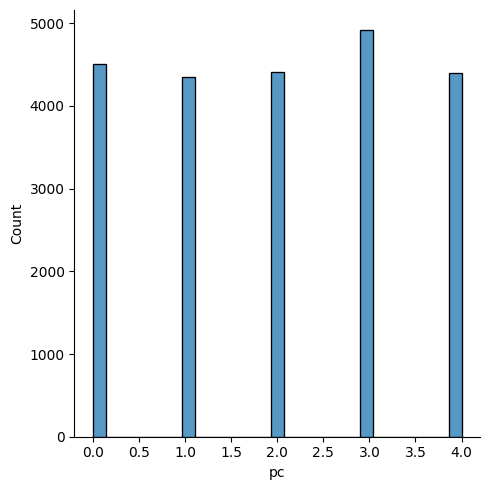

ma
-0.3989871595361413


<Figure size 640x480 with 0 Axes>

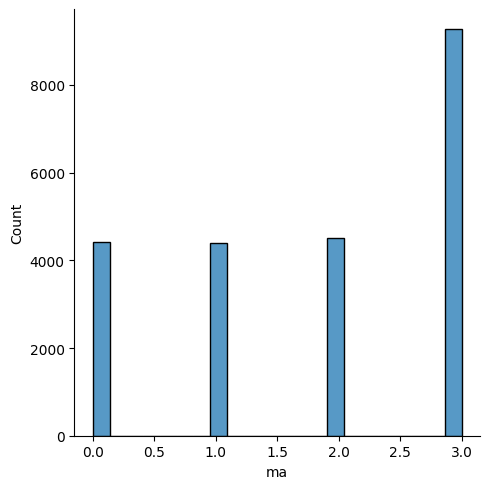

ld
0.9476341535835637


<Figure size 640x480 with 0 Axes>

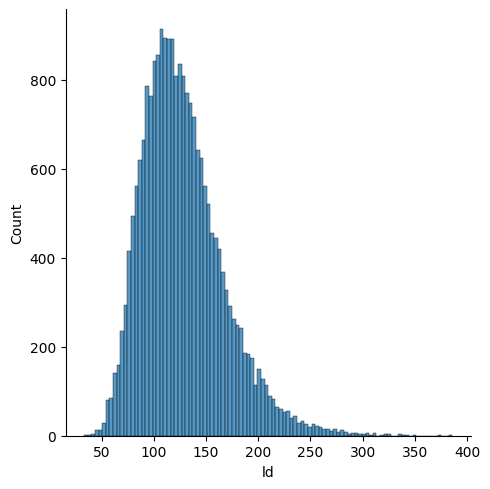

m0
0.6945472671826601


<Figure size 640x480 with 0 Axes>

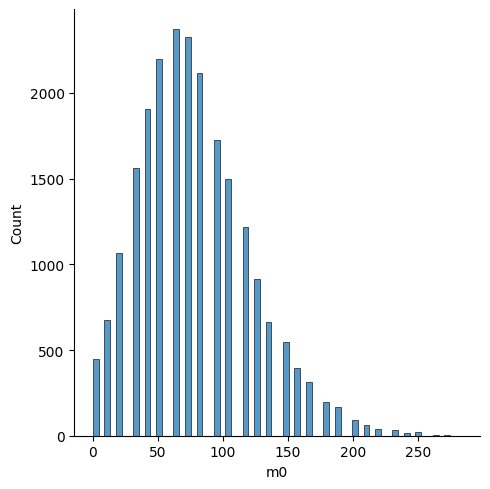

m1
0.47666949194808284


<Figure size 640x480 with 0 Axes>

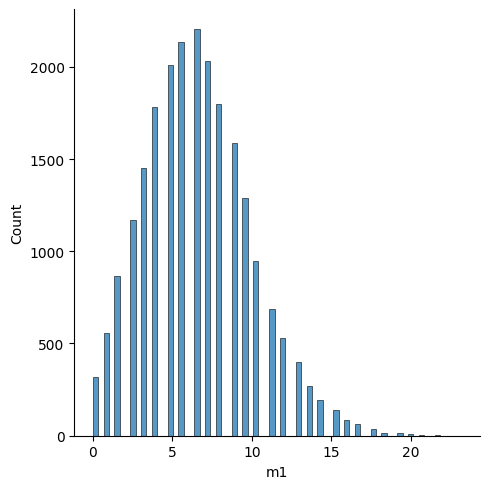

m2
0.5877689592125078


<Figure size 640x480 with 0 Axes>

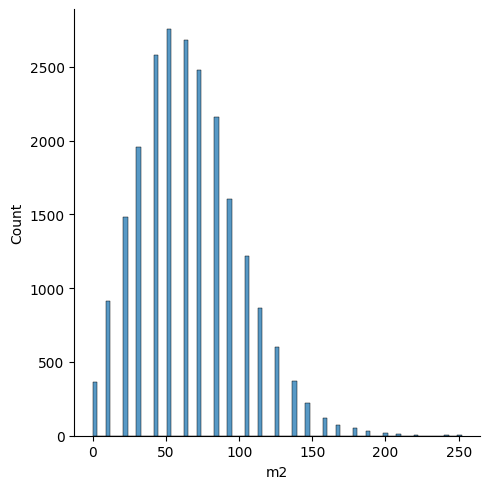

m3
-0.011482633739006431


<Figure size 640x480 with 0 Axes>

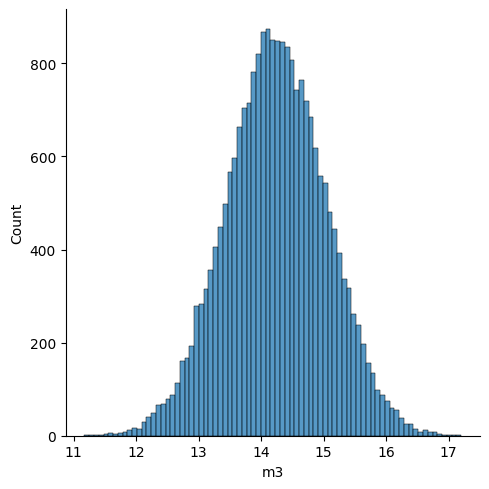

m4
0.011635876399995674


<Figure size 640x480 with 0 Axes>

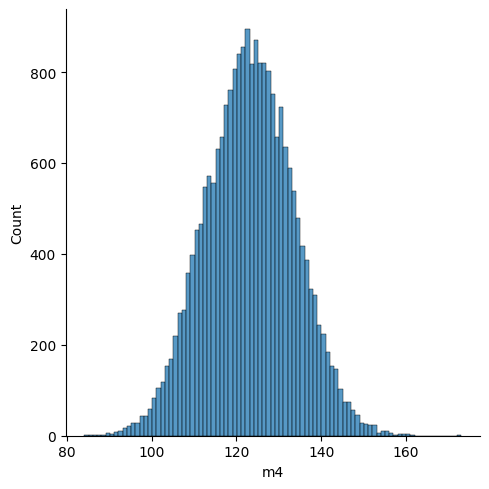

m5
0.009239630957816058


<Figure size 640x480 with 0 Axes>

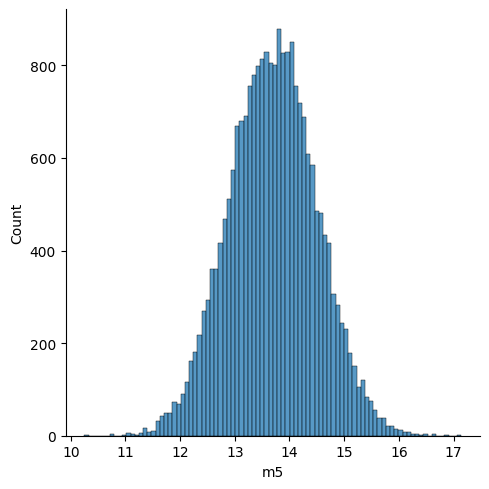

m6
-0.007259519548066231


<Figure size 640x480 with 0 Axes>

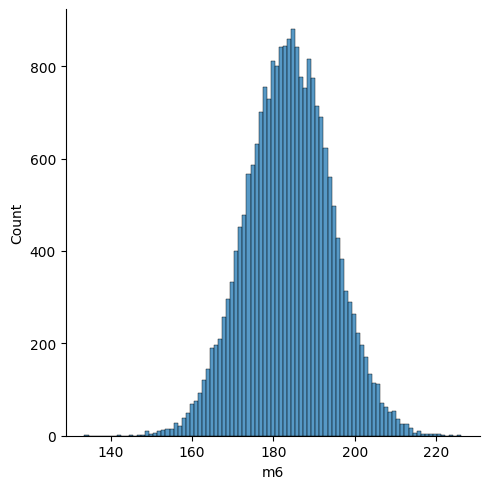

m7
-0.021605665216056294


<Figure size 640x480 with 0 Axes>

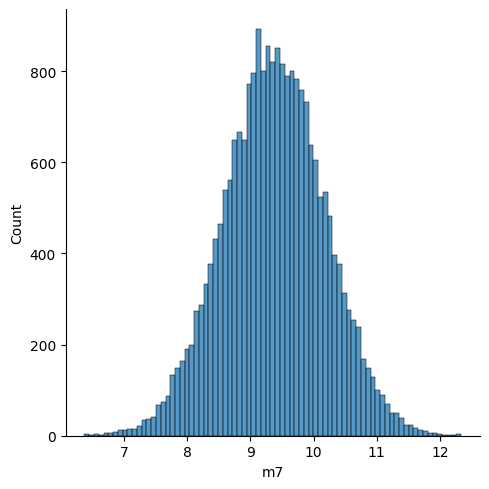

m8
0.01642746684217349


<Figure size 640x480 with 0 Axes>

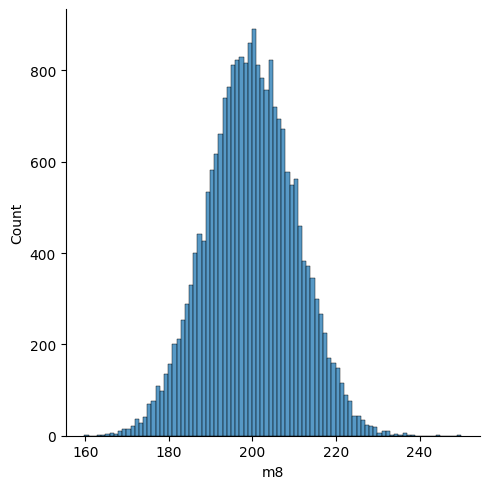

m9
-0.011325114316754146


<Figure size 640x480 with 0 Axes>

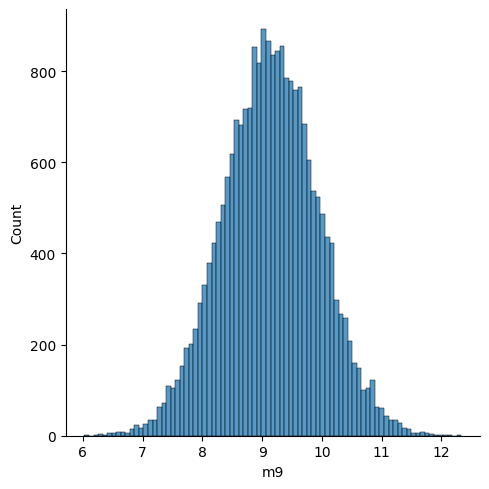

m10
-0.029376818298875354


<Figure size 640x480 with 0 Axes>

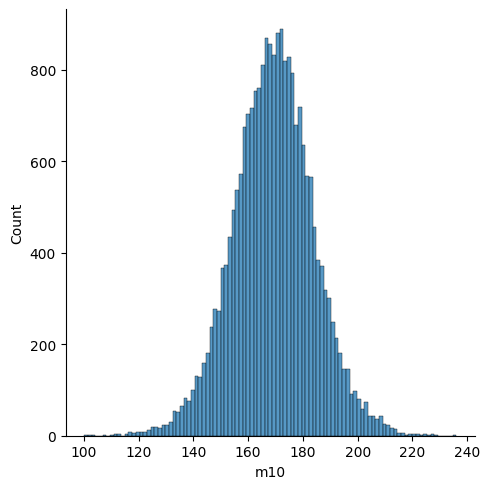

m11
-0.09403428082242221


<Figure size 640x480 with 0 Axes>

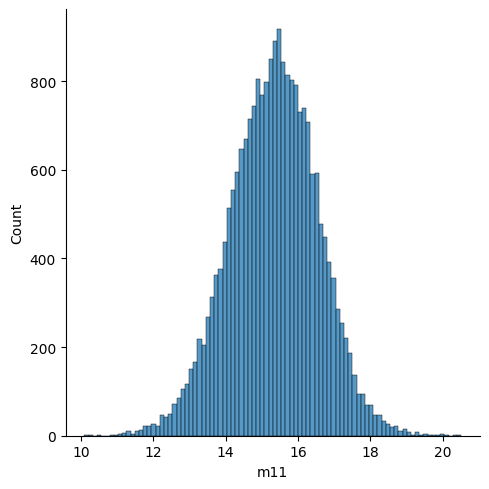

m12
-0.05844146507933769


<Figure size 640x480 with 0 Axes>

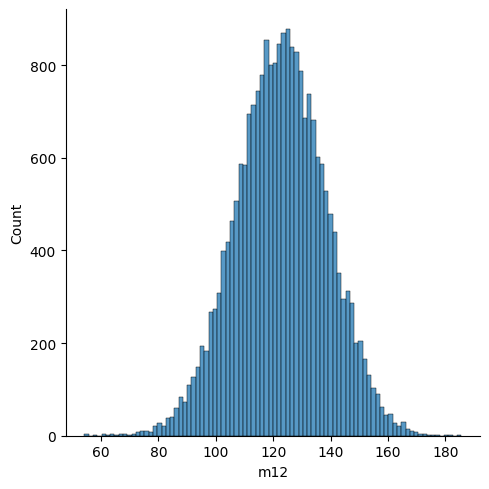

m13
0.23554307816755926


<Figure size 640x480 with 0 Axes>

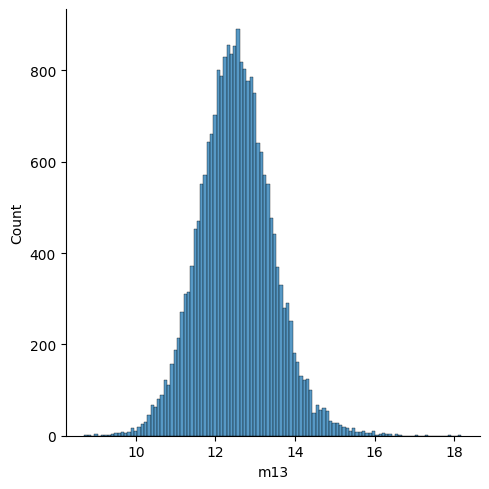

m14
-0.043232243039160546


<Figure size 640x480 with 0 Axes>

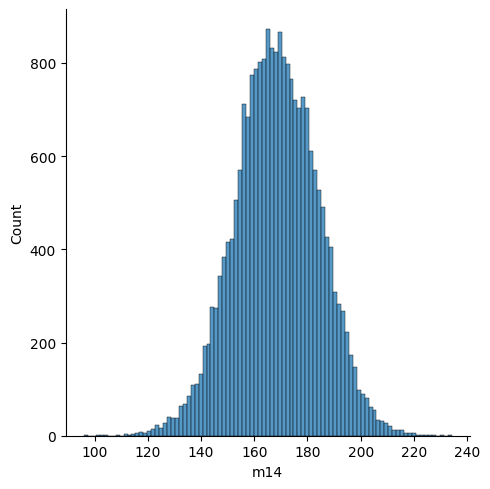

pred
1.3819032051747715


<Figure size 640x480 with 0 Axes>

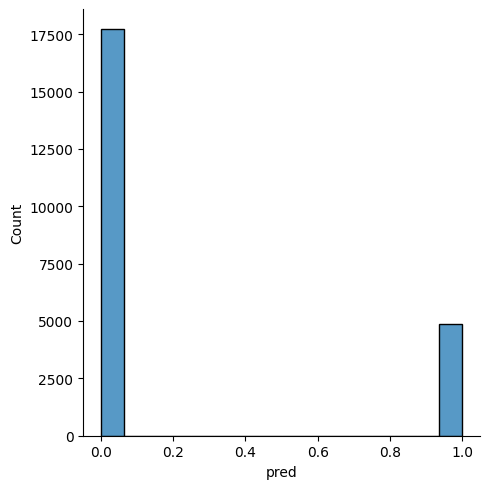

In [71]:
for col in train:
  print(col)
  print(skew(train[col]))

  plt.figure()
  sns.displot(train[col])
  plt.show()

##Split

In [92]:
x_train = train.drop('pred', axis=1).values
y_train = train['pred'].values

In [100]:
x_test = test.drop('index', axis=1).values

In [101]:
x_test.shape

(3986, 18)

##Training and Testing

In [94]:
model = LinearRegression()  # Replace with the desired model
model.fit(x_train, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(x_test)

In [104]:
y_pred.shape

(3986,)

In [118]:
for i in range(y_pred.shape[0]):
  if(y_pred[i]>0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [119]:
df = pd.DataFrame(y_pred)
df.to_csv("Prateek_psogra20.csv")

In [125]:
df.rename(columns = {'0':'pred'},
            inplace = True)
print(df)

        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
3981  0.0
3982  0.0
3983  0.0
3984  0.0
3985  0.0

[3986 rows x 1 columns]
